In [269]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from optimal_polygon import optimal_polygon

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First we define point sequence

In [270]:
def piecewise_via(points):
    y = []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i+1]
        k = (A[1] - B[1]) / (A[0] - B[0])
        b = A[1] - A[0] * k
        for j in range(A[0], B[0]):
            y.append(j * k + b)
    return np.array(y)

points = [(0, 22), (6, 15), (13, 27), (25, 8), (34, 20), (39, 12), (50, 25)]
w = 6    # shift for the tunnel
y = piecewise_via(points)

Then we push it to get a tunnel in which polygon will be constructed

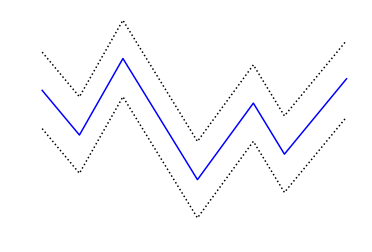

In [271]:
plt.plot(y, color='b')
plt.plot(y + w, linestyle=':', color='black')
plt.plot(y - w, linestyle=':', color='black')
plt.axis('off')
plt.show()

Let's take a look at fitting process.

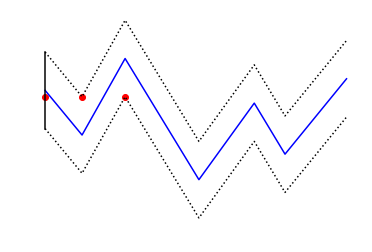

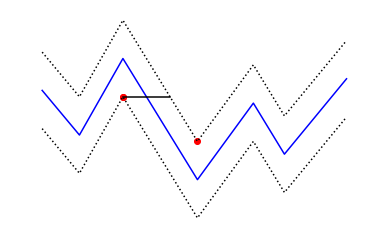

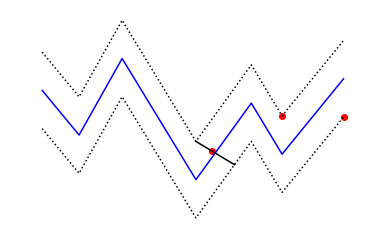

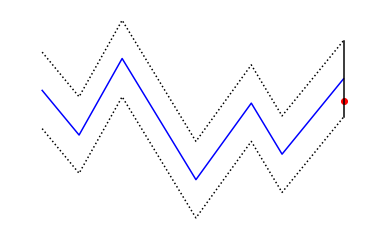

In [320]:
out = optimal_polygon(y, w, debug=True)

for q in out:
    plt.plot(y, color='b')
    plt.plot(y + w, linestyle=':', color='black')
    plt.plot(y - w, linestyle=':', color='black')
    plt.scatter(q[:3, 0], q[:3, 1], color='r')
    plt.plot(q[3:, 0], q[3:, 1], color='black')
    plt.axis('off')
    plt.show()

By changing tunnel width we can contol level of fit.

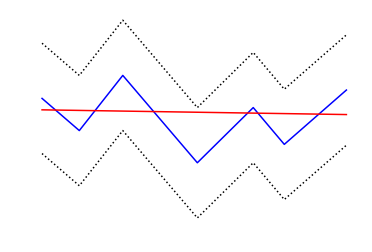

In [326]:
w = 12
out = optimal_polygon(y, w)

plt.plot(y, color='b')
plt.plot(y + w, linestyle=':', color='black')
plt.plot(y - w, linestyle=':', color='black')
plt.plot(out[:, 0], out[:, 1], color='r')
plt.axis('off')
plt.show()

Plots for gif.

In [331]:
for i, w in enumerate(np.linspace(10, 0.01, 50)):
    out = optimal_polygon(y, w)
    plt.plot(y, color='b')
    plt.plot(y + w, linestyle=':', color='black')
    plt.plot(y - w, linestyle=':', color='black')
    plt.plot(out[:, 0], out[:, 1], color='r')
    plt.axis('off')
    plt.savefig('{:02d}.jpg'.format(i))
    plt.close()